# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
cities_df = pd.DataFrame(cities, columns=["City"])
cities_df = cities_df.set_index("City")
cities_df

""
City
waitangi
tindouf
port mathurin
iskilip
bilibino
...
ghadamis
hugo
bahia de kino


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "isla vista"
city_url = f"{url}appid={weather_api_key}&q={city}"
city_weather = requests.get(city_url).json()
city_weather
city_url

'http://api.openweathermap.org/data/2.5/weather?appid=1178834df81505d3a6328764b26b4da3&q=isla vista'

In [5]:
city_lat = city_weather["coord"]["lat"]
print(city_lat)

34.4133


In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

        # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

        # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_wind = city_weather["sys"]["country"]
        city_date = city_wind = city_weather["sys"]["sunrise"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                                  "Lat": city_lat, 
                                  "Lng": city_lng, 
                                  "Max Temp": city_max_temp,
                                  "Humidity": city_humidity,
                                  "Cloudiness": city_clouds,
                                  "Wind Speed": city_wind,
                                  "Country": city_country,
                                  "Date": city_date})           

    # If an error is experienced, skip the city
    except:
            print("City not found. Skipping...")
            pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | tindouf
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | iskilip
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | siwa oasis
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | port augusta
Processing Record 10 of Set 1 | katsuura
Processing Record 11 of Set 1 | el hamma
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | puerto armuelles
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | inhuma
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | turpan
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | codrington
Proces

Processing Record 40 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 41 of Set 4 | charlottetown
Processing Record 42 of Set 4 | biryusinsk
Processing Record 43 of Set 4 | bonthe
Processing Record 44 of Set 4 | tobol'sk
Processing Record 45 of Set 4 | colonia
Processing Record 46 of Set 4 | kongoussi
Processing Record 47 of Set 4 | kondratovo
Processing Record 48 of Set 4 | brezina
Processing Record 49 of Set 4 | invercargill
Processing Record 0 of Set 5 | palmer
Processing Record 1 of Set 5 | meadow lake
Processing Record 2 of Set 5 | terenozek
Processing Record 3 of Set 5 | teguise
Processing Record 4 of Set 5 | takab
Processing Record 5 of Set 5 | anadyr
Processing Record 6 of Set 5 | phan thiet
Processing Record 7 of Set 5 | salalah
Processing Record 8 of Set 5 | port alfred
Processing Record 9 of Set 5 | avarua
Processing Record 10 of Set 5 | lutes mountain
City not found. Skipping...
Processing Record 11 of Set 5 | ulladulla
Processing Record 12 of Set 5 | wai

Processing Record 30 of Set 8 | hasaki
Processing Record 31 of Set 8 | newport
Processing Record 32 of Set 8 | greenland
Processing Record 33 of Set 8 | san jose de guanipa
Processing Record 34 of Set 8 | nyurba
Processing Record 35 of Set 8 | yagry
City not found. Skipping...
Processing Record 36 of Set 8 | yeosu
Processing Record 37 of Set 8 | new plymouth
Processing Record 38 of Set 8 | kalmunai
Processing Record 39 of Set 8 | coahuayana de hidalgo
Processing Record 40 of Set 8 | ljutomer
Processing Record 41 of Set 8 | tacurong
Processing Record 42 of Set 8 | kabinda
Processing Record 43 of Set 8 | poronaysk
Processing Record 44 of Set 8 | nuuk
Processing Record 45 of Set 8 | taksimo
Processing Record 46 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 47 of Set 8 | riobamba
Processing Record 48 of Set 8 | kimbe
Processing Record 49 of Set 8 | princeville
Processing Record 0 of Set 9 | concordia
Processing Record 1 of Set 9 | yinchuan
Processing Record 2 of Set 9

Processing Record 21 of Set 12 | wagar
Processing Record 22 of Set 12 | malabar
Processing Record 23 of Set 12 | san julian
Processing Record 24 of Set 12 | leava
Processing Record 25 of Set 12 | quelimane
Processing Record 26 of Set 12 | coaldale
Processing Record 27 of Set 12 | santa ana
Processing Record 28 of Set 12 | damghan
Processing Record 29 of Set 12 | izazi
Processing Record 30 of Set 12 | sariyahsi
Processing Record 31 of Set 12 | fada
Processing Record 32 of Set 12 | lonar
Processing Record 33 of Set 12 | nkoteng
Processing Record 34 of Set 12 | smithers
Processing Record 35 of Set 12 | kapa'a
Processing Record 36 of Set 12 | hastings
Processing Record 37 of Set 12 | ghadamis
Processing Record 38 of Set 12 | hugo
Processing Record 39 of Set 12 | bahia de kino
Processing Record 40 of Set 12 | kirensk
Processing Record 41 of Set 12 | hilo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.57,96,91,1698338151,NZ,1698338151
1,tindouf,27.6711,-8.1474,25.66,22,0,1698215898,DZ,1698215898
2,port mathurin,-19.6833,63.4167,24.78,80,10,1698196163,MU,1698196163
3,iskilip,40.7353,34.4739,22.58,33,99,1698206615,TR,1698206615
4,bilibino,68.0546,166.4372,-16.93,99,33,1698179584,RU,1698179584


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.57,96,91,1698338151,NZ,1698338151
1,tindouf,27.6711,-8.1474,25.66,22,0,1698215898,DZ,1698215898
2,port mathurin,-19.6833,63.4167,24.78,80,10,1698196163,MU,1698196163
3,iskilip,40.7353,34.4739,22.58,33,99,1698206615,TR,1698206615
4,bilibino,68.0546,166.4372,-16.93,99,33,1698179584,RU,1698179584


In [11]:
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed      int64
Country        object
Date            int64
dtype: object

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

The correlation between both factors is -0.55


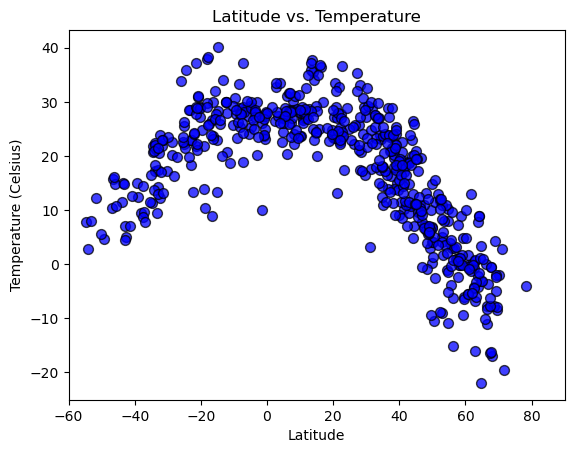

In [30]:
# Build scatter plot for latitude vs. temperature
lat_axis = city_data_df["Lat"]
temp_axis = city_data_df["Max Temp"]

# Incorporate the other graph properties
correlation = st.pearsonr(lat_axis,temp_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.scatter(lat_axis, temp_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.title("Latitude vs. Temperature")
plt.xlim(-60, 90)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

The correlation between both factors is 0.12


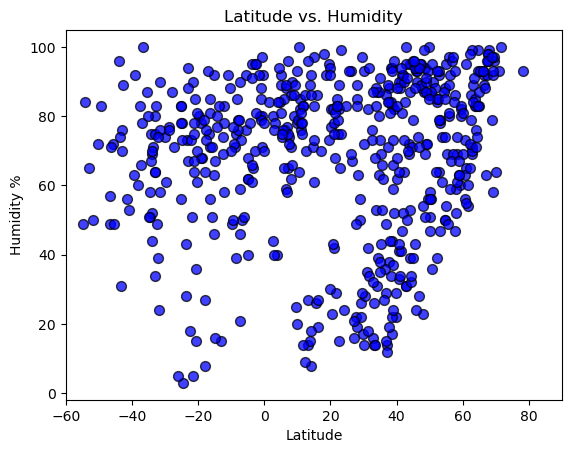

In [31]:
# Build the scatter plots for latitude vs. humidity
lat_axis = city_data_df["Lat"]
humidity_axis = city_data_df["Humidity"]

# Incorporate the other graph properties
correlation = st.pearsonr(lat_axis,humidity_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.scatter(lat_axis, humidity_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.xlim(-60, 90)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Latitude vs. Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

The correlation between both factors is 0.14


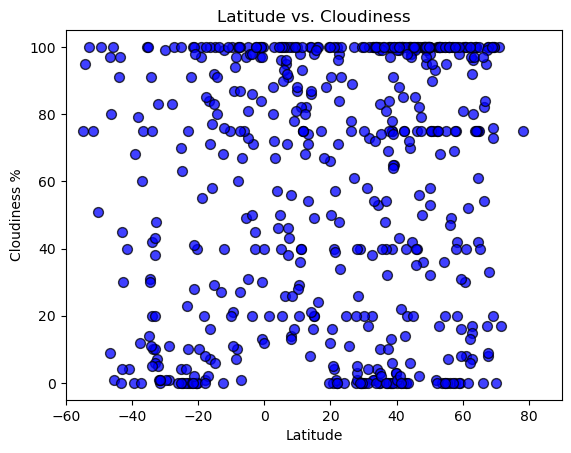

In [32]:
# Build the scatter plots for latitude vs. cloudiness
lat_axis = city_data_df["Lat"]
cloudiness_axis = city_data_df["Cloudiness"]

# Incorporate the other graph properties
correlation = st.pearsonr(lat_axis,cloudiness_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.scatter(lat_axis, cloudiness_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.xlim(-60, 90)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Latitude vs. Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

The correlation between both factors is 0.05


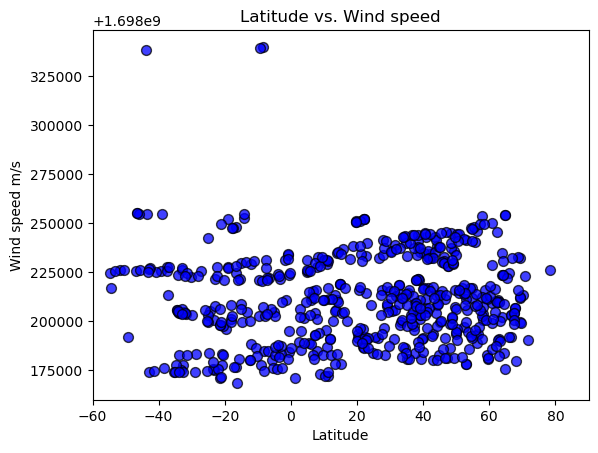

In [33]:
# Build the scatter plots for latitude vs. wind speed
lat_axis = city_data_df["Lat"]
wind_speed_axis = city_data_df["Wind Speed"]

# Incorporate the other graph properties
correlation = st.pearsonr(lat_axis,wind_speed_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.scatter(lat_axis, wind_speed_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.xlim(-60, 90)
plt.xlabel("Latitude")
plt.ylabel("Wind speed m/s")
plt.title("Latitude vs. Wind speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The correlation between both factors is -0.55


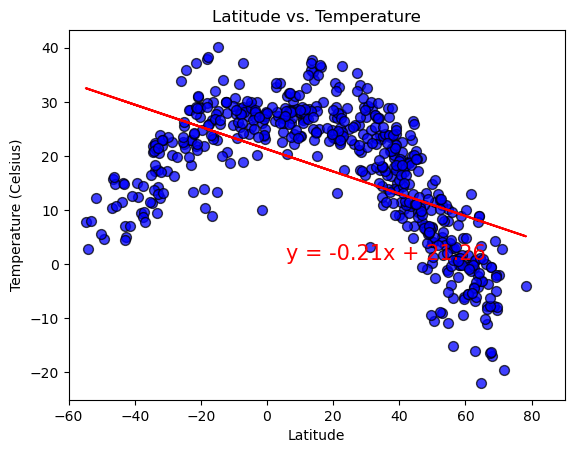

In [34]:
# Latitude vs. temperature
lat_axis = city_data_df["Lat"]
temp_axis = city_data_df["Max Temp"]

# Incorporate the other graph properties
correlation = st.pearsonr(lat_axis,temp_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, temp_axis)
regress_values = lat_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_axis, temp_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.title("Latitude vs. Temperature")
plt.xlim(-60, 90)

# Show plot
plt.show()

The correlation between both factors is 0.12


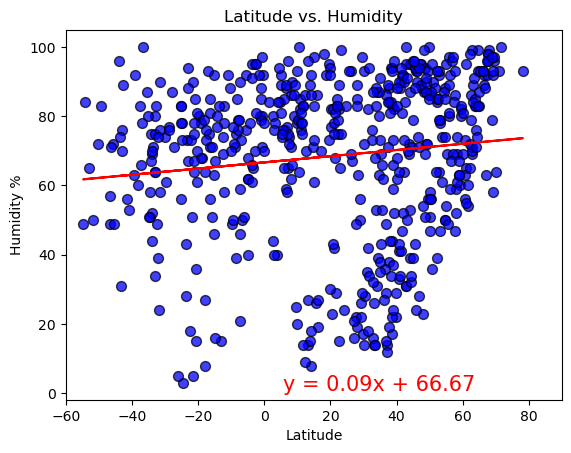

In [35]:
# Latitude vs. Humidity
lat_axis = city_data_df["Lat"]
humidity_axis = city_data_df["Humidity"]

# Incorporate the other graph properties
correlation = st.pearsonr(lat_axis,humidity_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, humidity_axis)
regress_values = lat_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_axis, humidity_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlim(-60, 90)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Latitude vs. Humidity")

plt.show()

The correlation between both factors is 0.14


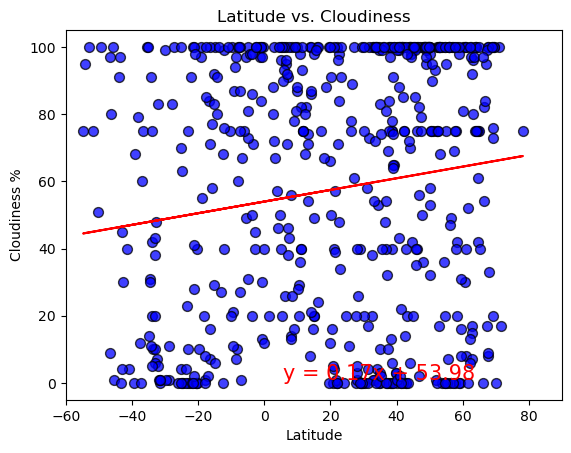

In [36]:
# Latitude vs. Cloudiness
lat_axis = city_data_df["Lat"]
cloudiness_axis = city_data_df["Cloudiness"]

# Incorporate the other graph properties
correlation = st.pearsonr(lat_axis,cloudiness_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, cloudiness_axis)
regress_values = lat_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_axis, cloudiness_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlim(-60, 90)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Latitude vs. Cloudiness")

plt.show()

The correlation between both factors is 0.05


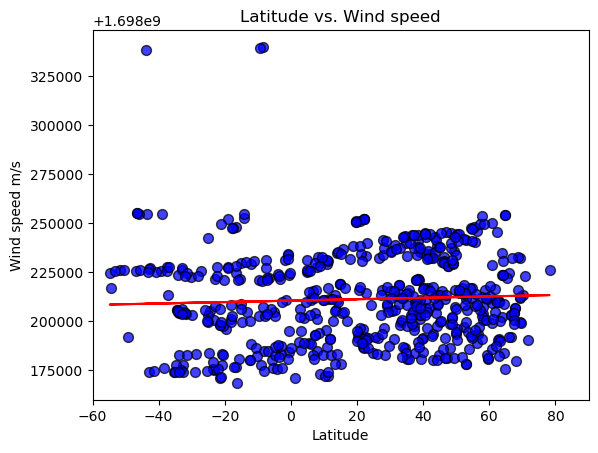

In [37]:
# Build the scatter plots for latitude vs. wind speed
lat_axis = city_data_df["Lat"]
wind_speed_axis = city_data_df["Wind Speed"]

# Incorporate the other graph properties
correlation = st.pearsonr(lat_axis,wind_speed_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, wind_speed_axis)
regress_values = lat_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_axis, wind_speed_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlim(-60, 90)
plt.xlabel("Latitude")
plt.ylabel("Wind speed m/s")
plt.title("Latitude vs. Wind speed")


plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tindouf,27.6711,-8.1474,25.66,22,0,1698215898,DZ,1698215898
3,iskilip,40.7353,34.4739,22.58,33,99,1698206615,TR,1698206615
4,bilibino,68.0546,166.4372,-16.93,99,33,1698179584,RU,1698179584
5,olonkinbyen,70.9221,-8.7187,2.74,93,100,1698223056,SJ,1698223056
6,siwa oasis,29.2041,25.5195,29.11,26,0,1698207913,EG,1698207913


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.57,96,91,1698338151,NZ,1698338151
2,port mathurin,-19.6833,63.4167,24.78,80,10,1698196163,MU,1698196163
7,adamstown,-25.0660,-130.1015,22.25,83,4,1698242252,PN,1698242252
8,port augusta,-32.5000,137.7667,12.19,49,7,1698177489,AU,1698177489
12,margaret river,-33.9500,115.0667,17.26,69,42,1698182823,AU,1698182823


###  Temperature vs. Latitude Linear Regression Plot

The correlation between both factors is -0.87


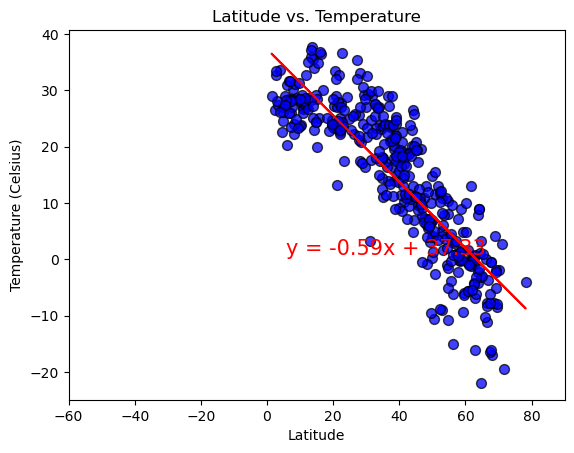

In [38]:
# Linear regression on Northern Hemisphere
# Latitude vs. temperature
lat_axis = northern_hemi_df["Lat"]
temp_axis = northern_hemi_df["Max Temp"]

# Incorporate the other graph properties
correlation = st.pearsonr(lat_axis,temp_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, temp_axis)
regress_values = lat_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_axis, temp_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.title("Latitude vs. Temperature")
plt.xlim(-60, 90)

# Show plot
plt.show()

The correlation between both factors is 0.69


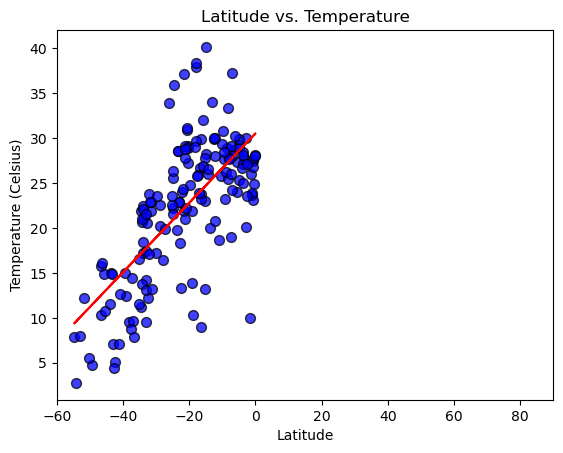

In [39]:
# Linear regression on Southern Hemisphere
# Latitude vs. temperature
lat_axis = southern_hemi_df["Lat"]
temp_axis = southern_hemi_df["Max Temp"]

# Incorporate the other graph properties
correlation = st.pearsonr(lat_axis,temp_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, temp_axis)
regress_values = lat_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_axis, temp_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.title("Latitude vs. Temperature")
plt.xlim(-60, 90)

# Show plot
plt.show()

**Discussion about the linear relationship:** 
Based on the analysis above, the temperature decreases as the latitutes move away from 0, that is as latitude decreases and increases away from the equator the temperature of a city becomes lower (colder). The correlation for both northern and southern hemisphere shows that this observation is accurate with a northern hemisphere latitude is -0.87 and sourthern hemisphere latitude is -0.69 with temperature. This suggests that laitude has a strong influence on the temperature of a region.

### Humidity vs. Latitude Linear Regression Plot

The correlation between both factors is 0.18


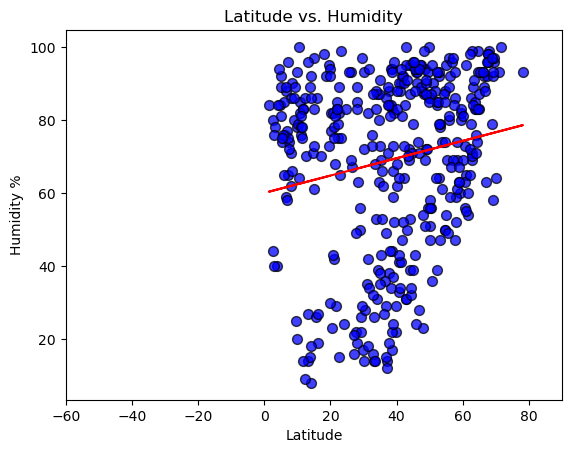

In [40]:
# Northern Hemisphere
# Latitude vs. Humidity
lat_axis = northern_hemi_df["Lat"]
humidity_axis = northern_hemi_df["Humidity"]

# Incorporate the other graph properties
correlation = st.pearsonr(lat_axis,humidity_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, humidity_axis)
regress_values = lat_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_axis, humidity_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlim(-60, 90)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Latitude vs. Humidity")

plt.show()

The correlation between both factors is 0.12


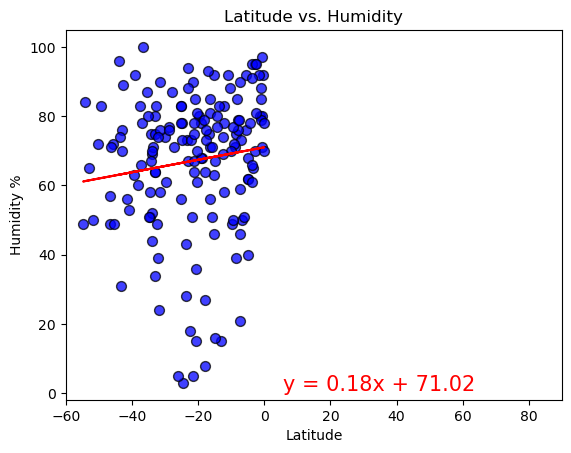

In [41]:
# Southern Hemisphere
# Latitude vs. Humidity
lat_axis = southern_hemi_df["Lat"]
humidity_axis = southern_hemi_df["Humidity"]

# Incorporate the other graph properties
correlation = st.pearsonr(lat_axis,humidity_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, humidity_axis)
regress_values = lat_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_axis, humidity_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlim(-60, 90)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Latitude vs. Humidity")

plt.show()

**Discussion about the linear relationship:** 
Humidity slightly increases as latitude increases. The increase is greater in the northern hemisphere, while the increases in the southern semisphere is only small. While this may be an obesrvation when we are looking at the linear regression line and equation, the pearsons correlation for both northern and southern hemisphere suggests that there is a small correlation between latitude and humidity with a correlation score of 0.18 and 0.12 respectively. This suggests that there are other factors that influence the humidity more than latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between both factors is 0.04


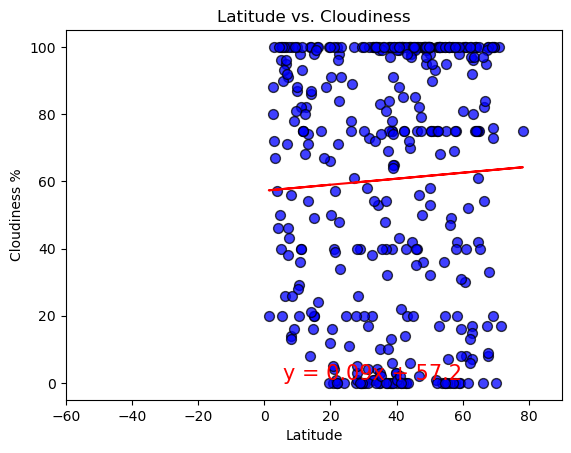

In [42]:
# Northern Hemisphere
# Latitude vs. Cloudiness
lat_axis = northern_hemi_df["Lat"]
cloudiness_axis = northern_hemi_df["Cloudiness"]

# Incorporate the other graph properties
correlation = st.pearsonr(lat_axis,cloudiness_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, cloudiness_axis)
regress_values = lat_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_axis, cloudiness_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlim(-60, 90)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Latitude vs. Cloudiness")

plt.show()

The correlation between both factors is 0.19


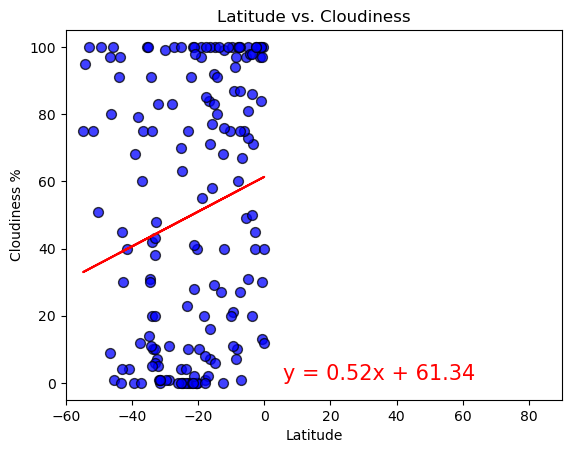

In [43]:
# Southern Hemisphere
# Latitude vs. Cloudiness
lat_axis = southern_hemi_df["Lat"]
cloudiness_axis = southern_hemi_df["Cloudiness"]

# Incorporate the other graph properties
correlation = st.pearsonr(lat_axis,cloudiness_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, cloudiness_axis)
regress_values = lat_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_axis, cloudiness_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlim(-60, 90)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Latitude vs. Cloudiness")

plt.show()

**Discussion about the linear relationship:** 
Generally cloudiness increases as latitude increase and based on the linear regression and equation, cloudiness increases more as your get closer to the equator (latitude = 0) then a smaller increases as the latitude moved positively away from the equator. However, the pearsons correlation for both northern and southern hemisphere suggests that there is a small correlation between latitude and cloudiness with a correlation score of 0.04 and 0.19 respectively. This suggests that there are other factors that influence the cloudiness more than latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between both factors is 0.06


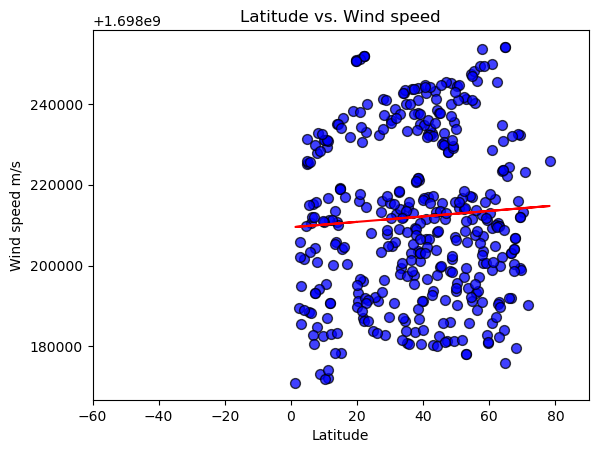

In [44]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. wind speed
lat_axis = northern_hemi_df["Lat"]
wind_speed_axis = northern_hemi_df["Wind Speed"]

# Incorporate the other graph properties
correlation = st.pearsonr(lat_axis,wind_speed_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, wind_speed_axis)
regress_values = lat_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_axis, wind_speed_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlim(-60, 90)
plt.xlabel("Latitude")
plt.ylabel("Wind speed m/s")
plt.title("Latitude vs. Wind speed")


plt.show()

The correlation between both factors is -0.12


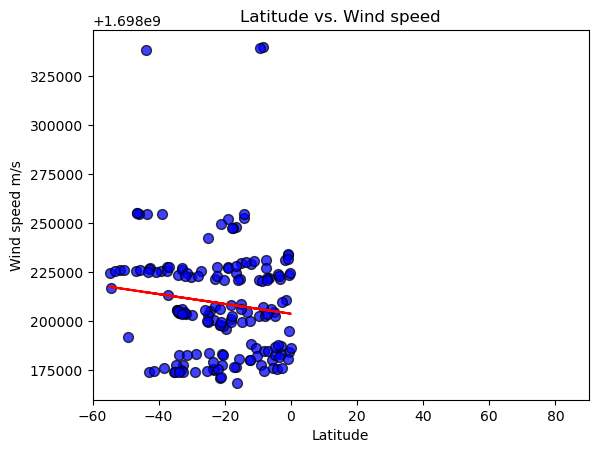

In [45]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. wind speed
lat_axis = southern_hemi_df["Lat"]
wind_speed_axis = southern_hemi_df["Wind Speed"]

# Incorporate the other graph properties
correlation = st.pearsonr(lat_axis,wind_speed_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, wind_speed_axis)
regress_values = lat_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_axis, wind_speed_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlim(-60, 90)
plt.xlabel("Latitude")
plt.ylabel("Wind speed m/s")
plt.title("Latitude vs. Wind speed")


plt.show()

**Discussion about the linear relationship:** 
In general, from obeserving the linear regression for the relationship between northern hemisphere and the southern hemisphere, it seems that windiness increases as your move away from the equator (latitude = 0). However, based on the pearsons correlation score for both northern (0.06) and sourthern (-0.12) hemispheres there is a very weak relationship with wind peed. This suggests that there are other factors that influence the wind speeds more than latitude.